In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [3]:
!pip install nbimporter

In [20]:
import nbimporter

# Import the notebook as a module
import _02_Data_Exploration as data_exploration

In [5]:
# %run "02. Data Exploration.ipynb"

In [33]:
df.dtypes

PatientID                   int64
Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
DoctorInCharge             object
dtype: object

In [31]:
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

### Example of filling missing values

In [13]:
df.fillna(df.mean(), inplace=True)  # For numerical columns
df.fillna(df.mode().iloc[0], inplace=True)  # For categorical columns

C:\Users\galin\AppData\Local\Temp\ipykernel_31676\3208242791.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)  # For numerical columns


Series([], dtype: int64)


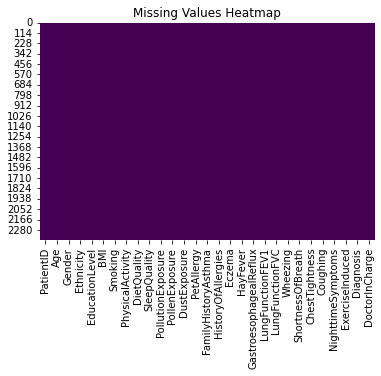

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [16]:
# Impute missing values with mode (categorical features)
df.fillna(df.mode().iloc[0], inplace=True)

# Alternatively, use a placeholder value
# df.fillna('Unknown', inplace=True)

In [34]:
numerical_features = [
    'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
    'PollenExposure', 'DustExposure', 'LungFunctionFEV1', 'LungFunctionFVC'
]

### Scaling numerical features

In [38]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [40]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,-1.582769,0,-1.432099,0.160113,0.971063,...,-1.368934,0.920608,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,-0.623300,0,0.291269,0.453069,-1.076746,...,-0.407132,-1.564256,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,-1.229074,0,0.581330,1.434458,-0.102976,...,-0.987146,0.983019,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,1.565307,0,-1.256398,0.276233,-1.596880,...,0.561114,-1.105641,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,-1.105686,0,-0.154081,-0.651625,1.504976,...,1.070095,-0.516586,1,1,1,0,0,1,0,Dr_Confid


### Feature engineering: Interaction between BMI and Physical Activity

In [44]:
df['BMI_PhysicalActivity'] = df['BMI'] * df['PhysicalActivity']

In [43]:
df['BMI_PhysicalActivity']

0       2.266683
1      -0.181548
2      -0.714497
3      -1.966649
4       0.170366
          ...   
2387   -0.176417
2388   -0.234435
2389   -0.148975
2390   -0.840122
2391   -0.144468
Name: BMI_PhysicalActivity, Length: 2392, dtype: float64